### Gradient Desent

- Linear Gradient Descent
- Multi Linear Gradient Descent
- Naive vs Vectorized 시간 비교


epoch 0: m_grad= -2010.578272, c_grad= -128.088261, m= 2.010578, c= 0.128088
epoch 1000: m_grad= 0.638426, c_grad= -11.725729, m= 3.044511, c= 15.109091
epoch 2000: m_grad= 0.403252, c_grad= -7.406372, m= 2.532763, c= 24.508185
epoch 3000: m_grad= 0.254708, c_grad= -4.678118, m= 2.209525, c= 30.444975
epoch 4000: m_grad= 0.160882, c_grad= -2.954860, m= 2.005356, c= 34.194855
epoch 5000: m_grad= 0.101619, c_grad= -1.866391, m= 1.876397, c= 36.563407
epoch 6000: m_grad= 0.064186, c_grad= -1.178876, m= 1.794942, c= 38.059466
epoch 7000: m_grad= 0.040542, c_grad= -0.744619, m= 1.743492, c= 39.004428
epoch 8000: m_grad= 0.025608, c_grad= -0.470327, m= 1.710994, c= 39.601299
epoch 9000: m_grad= 0.016175, c_grad= -0.297074, m= 1.690468, c= 39.978302


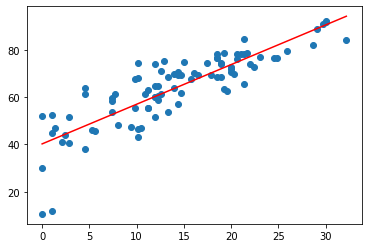

epoch 0: m1_grad= -1003.713820, m2_grad= -2385.090065, m3_grad= -2010.578272, c_grad= -128.088261, c= 0.192132
epoch 1000: m1_grad= -0.064889, m2_grad= 0.026479, m3_grad= 0.000594, c_grad= 0.005460, c= 0.160160
epoch 2000: m1_grad= -0.005521, m2_grad= 0.001552, m3_grad= 0.000045, c_grad= 0.013608, c= 0.143244
epoch 3000: m1_grad= -0.002129, m2_grad= 0.000132, m3_grad= 0.000014, c_grad= 0.013998, c= 0.122390
epoch 4000: m1_grad= -0.001926, m2_grad= 0.000051, m3_grad= 0.000012, c_grad= 0.013947, c= 0.101423
epoch 5000: m1_grad= -0.001904, m2_grad= 0.000046, m3_grad= 0.000012, c_grad= 0.013871, c= 0.080558
epoch 6000: m1_grad= -0.001893, m2_grad= 0.000045, m3_grad= 0.000012, c_grad= 0.013795, c= 0.059809
epoch 7000: m1_grad= -0.001882, m2_grad= 0.000045, m3_grad= 0.000012, c_grad= 0.013718, c= 0.039174
epoch 8000: m1_grad= -0.001872, m2_grad= 0.000045, m3_grad= 0.000012, c_grad= 0.013642, c= 0.018655
epoch 9000: m1_grad= -0.001861, m2_grad= 0.000045, m3_grad= 0.000012, c_grad= 0.013566, c

In [22]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import animation

def save_score_data():
    xlsx_file = 'db_score.xlsx'
    db_score = pd.read_excel(xlsx_file)
    
    conn = pymysql.connect(host='localhost', user='root', password='gusaud123', db='university')
    curs = conn.cursor(pymysql.cursors.DictCursor)
    
    drop_sql = """drop table if exists db_score"""
    curs.execute(drop_sql)
    conn.commit()
    
    import sqlalchemy
    
    database_username = 'root'
    database_password = 'gusaud123'
    database_ip = 'localhost'
    database_name = 'university'
    database_connection = sqlalchemy.create_engine('mysql+pymysql://{0}:{1}@{2}/{3}'.
                                                    format(database_username, database_password,
                                                          database_ip, database_name))
    db_score.to_sql(con=database_connection, name='db_score', if_exists='replace')
    

# MySql에서 db_score데이터 불러오기
def load_dbscore_data():

    conn = pymysql.connect(host='localhost', user='root', password='gusaud123', db='university')
    curs = conn.cursor(pymysql.cursors.DictCursor)

    sql = "select * from db_score"
    curs.execute(sql)
    data = curs.fetchall()

    curs.close()
    conn.close()

    X = [ ( t['final'] )  for t in data ]
    X = np.array(X)

    y = [ (t['score'] )  for t in data ]
    y = np.array(y)
    
    return X, y


# MySql에서 db_score데이터 불러오기
def Multi_load_dbscore_data():

    conn = pymysql.connect(host='localhost', user='root', password='gusaud123', db='university')
    curs = conn.cursor(pymysql.cursors.DictCursor)

    sql = "select * from db_score"
    curs.execute(sql)
    data = curs.fetchall()

    curs.close()
    conn.close()

    X1 = [ ( t['attendance'])  for t in data ]
    X2 = [ ( t['homework'])  for t in data ]
    X3 = [ (t['final'] )  for t in data ]
    X = [ ( t['attendance'], t['homework'], t['final'] )  for t in data ]
    X1 = np.array(X1)
    X2 = np.array(X2)
    X3 = np.array(X3)
    X = np.array(X)
    
    y = [ (t['score'] )  for t in data ]
    y = np.array(y)
    
    return X1,X2,X3,X, y

#fig = plt.figure()
#ax = plt.axes(xlim=(0, 50), ylim=(0, 100))
#line, = ax.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return(line,)

def animate(Xm, c):
            
    y_pred = m*X + c
        
    x = np.linspace(0, 10, 100)
    y = y_pred
    line.set_data(x,y)
            
    return (line,)


def linear_gradient_descent_vectorized(X,y):
    
    epochs = 10000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    c = 0.0
    
    n = len(y)
    c_grad = 0.0
    m_grad = 0.0
    
    for epoch in range(epochs):

        y_pred = m*X + c
        m_grad = (2*(y_pred - y)*X).sum()/n
        c_grad = (2*(y_pred - y)).sum()/n
        

        m = m - learning_rate*m_grad
        c = c - learning_rate*c_grad
        
        if( epoch % 1000 == 0):
            print("epoch %d: m_grad= %f, c_grad= %f, m= %f, c= %f"%(epoch, m_grad, c_grad, m, c))
        if( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break         
        
    return m, c

def Multi_gradient_descent(X1,X2,X3,y):
    
    epochs = 10000
    min_grad = 0.0001
    learning_rate = 0.0015
    
    m1 = 0.0
    m2 = 0.0
    m3 = 0.0
    c = 0.0
    
    n = len(y)
    c_grad = 0.0
    m1_grad = 0.0
    m2_grad = 0.0
    m3_grad = 0.0
    
    for epoch in range(epochs):
        for i in range(n):
            y_pred = c
            y_pred += m1*X1[i] +m2*X2[i] +m3*X3[i]
            m1_grad += (2*(y_pred - y[i])*X1[i])
            m2_grad += (2*(y_pred - y[i])*X2[i])
            m3_grad += (2*(y_pred - y[i])*X3[i])
            c_grad += 2*(y_pred - y[i])
        
        c_grad /= n
        m1_grad /= n
        m2_grad /= n
        m3_grad /= n
        

        m1 = m1 - learning_rate*m1_grad
        m2 = m2 - learning_rate*m2_grad
        m3 = m3 - learning_rate*m3_grad
        c = c - learning_rate*c_grad
        
        if( epoch % 1000 == 0):
            print("epoch %d: m1_grad= %f, m2_grad= %f, m3_grad= %f, c_grad= %f, c= %f"%(epoch, m1_grad, m2_grad, m3_grad, c_grad, c))
            
        if abs(c_grad) > min_grad:
            continue
        
        if( abs(m1_grad) < min_grad and abs(m2_grad) < min_grad and abs(m3_grad) < min_grad and abs(c_grad) < min_grad ):
            break
    print()
            
        
    return m1,m2,m3, c

def Multi_gradient_descent_vectorized(X,y,num_params):
    
    epochs = 10000
    min_grad = 0.0001
    learning_rate = 0.0015
    
    m = np.zeros(num_params)
    c = 0.0
    n = len(y)
    
    for epoch in range(epochs):
        
        y_pred = np.sum(m*X, axis = 1) + c
        m_grad = np.sum(2*(y_pred - y)*np.transpose(X), axis = 1)/n
        c_grad = np.sum(2*(y_pred - y))/n
        
        m -= learning_rate*m_grad
        c = c - learning_rate*c_grad
        
        if( epoch % 1000 == 0):
            print("epoch %d: c1_grad= %f"%(epoch, c_grad))
            print("m_grad:", end = '')
            print(m_grad)
            print()
            print("epoch %d: c= %f"%(epoch, c))
            print("m:", end = '')
            print(m)
            print()
        if abs(max(m_grad)) < min_grad:
            break    
    print()
    return m, c


#load_score_data()

l_x, l_y = load_dbscore_data()
X1,X2,X3,X, y = Multi_load_dbscore_data()

import statsmodels.api as sm
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
ls = model.fit()

l_c = ls.params[0]
l_m1 = ls.params[1]
l_m2 = ls.params[2]
l_m3 = ls.params[3]
            
m, c = linear_gradient_descent_vectorized(l_x,l_y)

y_pred = m*l_x + c
plt.scatter(l_x, y)
plt.plot([min(l_x), max(l_x)], [min(y_pred), max(y_pred)], color= 'red')
plt.show()

start_time_naive = time.time()
m1, m2, m3, c = Multi_gradient_descent(X1,X2,X3,y)
end_time_naive = time.time()

start_time_vector = time.time()
(m_v1, m_v2, m_v3), v_c = Multi_gradient_descent_vectorized(X,y,3)

end_time_vector = time.time()

# mission1
print("simple_gd_m = %f, simple_gd_c=%f"% (m, c))
print()

# mission2
print("Ls Parameter: ")
print("l_c: %f, l_m1: %f,l_m2: %f,l_m3: %f"%(l_c, l_m1,l_m2,l_m3))
print()

print("Gd Parameter: ")
print("c: %f, m1: %f, m2: %f, m3: %f"%(c, m1, m2, m3))
print()

print("Gd Navie Time:")
print("%f seconds"%(start_time_naive - end_time_naive))
print()

print("Gd Vector Time:")
print("%f seconds"%(start_time_vector - end_time_vector))


# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

